###  병원개수와 인구와의 관계를 알아보도록 하겠습니다.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#### 지역별 인구와 밀도는 https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EC%9D%98%20%EC%A7%80%EC%97%AD%EB%B3%84%20%EC%9D%B8%EA%B5%AC%20%EC%88%9C%EC%9C%84?from=%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%2F%EC%9D%B8%EA%B5%AC%2F%EA%B8%B0%EC%B4%88%EC%9E%90%EC%B9%98%EB%8B%A8%EC%B2%B4%EB%B3%84 에서 가져와 korea_population_density.csv 에 저장하였습니다.

In [2]:
addr_pop_df = pd.read_csv('./korea_population_density.csv')
addr_pop_df.index = addr_pop_df.apply(lambda r: r['addr'], axis=1)
addr_pop_df

,addr,population_count,area,density
서울특별시 양천구,서울특별시 양천구,476714,17.40,27391.56
서울특별시 동대문구,서울특별시 동대문구,354403,14.21,24934.36
서울특별시 동작구,서울특별시 동작구,400588,16.35,24494.96
서울특별시 중랑구,서울특별시 중랑구,410417,18.50,22189.69
서울특별시 광진구,서울특별시 광진구,357397,17.06,20945.30
서울특별시 구로구,서울특별시 구로구,416766,20.12,20715.29
서울특별시 송파구,서울특별시 송파구,660676,33.88,19502.66
서울특별시 성북구,서울특별시 성북구,450005,24.58,18308.76
서울특별시 강동구,서울특별시 강동구,447960,24.59,18217.65
서울특별시 금천구,서울특별시 금천구,236302,13.02,18149.53


### 병원 정보를 다시 가져옵니다.

In [3]:
import json
path = './hospital_info.json'

with open(path, 'r') as rf:
    json_file = rf.read()
result = json.loads(json_file)

In [4]:
df1 = DataFrame(result)

In [5]:
# 상급 종합 병원
upper_geneal_df = df1[df1.clCdNm=='상급종합']
upper_general= pd.DataFrame(upper_geneal_df.addr.apply(lambda v: v.split()[:2]).tolist(),
                            columns=('d1', 'd2'))

In [6]:
# 종합 병원
geneal_df = df1[df1.clCdNm=='종합병원']
general= pd.DataFrame(geneal_df.addr.apply(lambda v: v.split()[:2]).tolist(),
                            columns=('d1', 'd2'))

In [7]:
df_all = pd.concat([upper_general, general], ignore_index=True)
df_all_count=  df_all.apply(lambda r: r['d1'] + ' ' + r['d2'] if r['d2'] else r['d1'], axis=1).value_counts()\


In [8]:
path =  './road_code_total.txt'
addr_list = list()
with open(path, 'r',  encoding = 'utf-8') as rf:
    for line in rf:
        addr_info = line.split("|")
        addr_list.append({'d1' : addr_info[5].strip(), 'd2' : addr_info[6].strip().split(' ',1)[0]})

addr_df = DataFrame(addr_list).drop_duplicates()

In [9]:
addr_df = DataFrame(addr_list).drop_duplicates() # 중복주소 제거
addr_df.index = addr_df.apply(lambda r:  r['d1'] + ' ' + r['d2'] if r['d2'] else r['d1'], axis=1)
df_all_count=  df_all.apply(lambda r: r['d1'] + ' ' + r['d2'] if r['d2'] else r['d1'], axis=1).value_counts()

In [10]:
hos_t_count = pd.DataFrame({'count': df_all_count}).fillna(0)
hos_t = pd.merge(addr_df, hos_t_count, how='outer', left_index=True, right_index=True)

In [11]:
def short_distr(name):
    name = name.strip()
    if name == '세종특별자치시':
        return "세종"
    print ("name = {}".format(name))
    wide, narrow = name.split(' ')[:2]
    wide, narrow = wide.strip(), narrow.strip()
    if narrow.endswith('구'):
        return wide[:2] + (narrow[:-1] if len(narrow) > 2 else narrow)
    elif narrow == '고성군': # 고성군은 강원도, 경상남도에 있다.
        return '고성({})'.format({'강원도': '강원', '경상남도': '경남'}[wide])
    elif wide.endswith("광역시"):
        return wide[:2] + (narrow[:-1] if len(narrow) > 2 else narrow)
    else:
        return narrow[:-1]

hos_t['shortname'] = list(map(short_distr, hos_t.index))
hos_t.head(1000)

name = 강원도 강릉시
name = 강원도 고성군
name = 강원도 동해시
name = 강원도 삼척시
name = 강원도 속초시
name = 강원도 양구군
name = 강원도 양양군
name = 강원도 영월군
name = 강원도 원주시
name = 강원도 인제군
name = 강원도 정선군
name = 강원도 철원군
name = 강원도 춘천시
name = 강원도 태백시
name = 강원도 평창군
name = 강원도 홍천군
name = 강원도 화천군
name = 강원도 횡성군
name = 경기도 가평군
name = 경기도 고양시
name = 경기도 과천시
name = 경기도 광명시
name = 경기도 광주시
name = 경기도 구리시
name = 경기도 군포시
name = 경기도 김포시
name = 경기도 남양주시
name = 경기도 동두천시
name = 경기도 부천시
name = 경기도 성남시
name = 경기도 수원시
name = 경기도 시흥시
name = 경기도 안산시
name = 경기도 안성시
name = 경기도 안양시
name = 경기도 양주시
name = 경기도 양평군
name = 경기도 여주시
name = 경기도 연천군
name = 경기도 오산시
name = 경기도 용인시
name = 경기도 의왕시
name = 경기도 의정부시
name = 경기도 이천시
name = 경기도 파주시
name = 경기도 평택시
name = 경기도 포천시
name = 경기도 하남시
name = 경기도 화성시
name = 경상남도 거제시
name = 경상남도 거창군
name = 경상남도 고성군
name = 경상남도 김해시
name = 경상남도 남해군
name = 경상남도 밀양시
name = 경상남도 사천시
name = 경상남도 산청군
name = 경상남도 양산시
name = 경상남도 의령군
name = 경상남도 진주시
name = 경상남도 창녕군
name = 경상남도 창원시
name = 경상남도 통영시
name = 경상남도 하동군
name = 경상남도 함안군
name =

,d1,d2,count,shortname
강원도 강릉시,강원도,강릉시,4.0,강릉
강원도 고성군,강원도,고성군,NaN,고성(강원)
강원도 동해시,강원도,동해시,1.0,동해
강원도 삼척시,강원도,삼척시,1.0,삼척
강원도 속초시,강원도,속초시,2.0,속초
강원도 양구군,강원도,양구군,NaN,양구
강원도 양양군,강원도,양양군,NaN,양양
강원도 영월군,강원도,영월군,1.0,영월
강원도 원주시,강원도,원주시,2.0,원주
강원도 인제군,강원도,인제군,NaN,인제


In [12]:
blockpositions = pd.read_csv('./block_map.csv', names=range(15))
blockpositions.head(10)

flatrows = []
for y, colcities in blockpositions.iterrows():
    for x, city in colcities.iteritems():
        if isinstance(city, str):
            flatrows.append((x, y, city))

blockpositions_tbl = pd.DataFrame(flatrows, columns=('x', 'y', 'city')).set_index('city').sort_index()
hospital_b = pd.merge(hos_t.fillna(0), blockpositions_tbl, how='left', left_on='shortname', right_index=True)

In [13]:
addr_hos_pop = pd.merge(addr_pop_df, hospital_b, how='outer', left_index=True, right_index=True)
addr_hos_pop

,addr,population_count,area,density,d1,d2,count,shortname,x,y
강원도 강릉시,강원도 강릉시,213605,1040.38,205.31,강원도,강릉시,4.0,강릉,11,4.0
강원도 고성군,강원도 고성군,29188,661.11,44.15,강원도,고성군,0.0,고성(강원),9,0.0
강원도 동해시,강원도 동해시,93085,180.20,516.57,강원도,동해시,1.0,동해,11,5.0
강원도 삼척시,강원도 삼척시,68812,1187.09,57.97,강원도,삼척시,1.0,삼척,11,8.0
강원도 속초시,강원도 속초시,82318,105.72,778.63,강원도,속초시,2.0,속초,9,1.0
강원도 양구군,강원도 양구군,23749,661.89,35.88,강원도,양구군,0.0,양구,8,0.0
강원도 양양군,강원도 양양군,27254,630.08,43.25,강원도,양양군,0.0,양양,10,2.0
강원도 영월군,강원도 영월군,40085,1127.62,35.55,강원도,영월군,1.0,영월,10,8.0
강원도 원주시,강원도 원주시,338701,867.82,390.29,강원도,원주시,2.0,원주,10,7.0
강원도 인제군,강원도 인제군,32532,1645.17,19.77,강원도,인제군,0.0,인제,9,2.0


In [14]:
addr_hos_pop['hospital_rate'] = addr_hos_pop['count']/addr_hos_pop['population_count']*1000000
addr_hos_pop

,addr,population_count,area,density,d1,d2,count,shortname,x,y,hospital_rate
강원도 강릉시,강원도 강릉시,213605,1040.38,205.31,강원도,강릉시,4.0,강릉,11,4.0,18.726153
강원도 고성군,강원도 고성군,29188,661.11,44.15,강원도,고성군,0.0,고성(강원),9,0.0,0.000000
강원도 동해시,강원도 동해시,93085,180.20,516.57,강원도,동해시,1.0,동해,11,5.0,10.742869
강원도 삼척시,강원도 삼척시,68812,1187.09,57.97,강원도,삼척시,1.0,삼척,11,8.0,14.532349
강원도 속초시,강원도 속초시,82318,105.72,778.63,강원도,속초시,2.0,속초,9,1.0,24.296023
강원도 양구군,강원도 양구군,23749,661.89,35.88,강원도,양구군,0.0,양구,8,0.0,0.000000
강원도 양양군,강원도 양양군,27254,630.08,43.25,강원도,양양군,0.0,양양,10,2.0,0.000000
강원도 영월군,강원도 영월군,40085,1127.62,35.55,강원도,영월군,1.0,영월,10,8.0,24.946988
강원도 원주시,강원도 원주시,338701,867.82,390.29,강원도,원주시,2.0,원주,10,7.0,5.904913
강원도 인제군,강원도 인제군,32532,1645.17,19.77,강원도,인제군,0.0,인제,9,2.0,0.000000


In [15]:
addr_hos_pop.sort_values(by='hospital_rate', ascending=False)

,addr,population_count,area,density,d1,d2,count,shortname,x,y,hospital_rate
대구광역시 중구,대구광역시 중구,79522,7.06,11271.30,대구광역시,중구,3.0,대구중구,10,13.0,37.725409
전라남도 영광군,전라남도 영광군,55447,474.97,116.74,전라남도,영광군,2.0,영광,1,17.0,36.070482
부산광역시 서구,부산광역시 서구,112374,13.94,8060.77,부산광역시,서구,4.0,부산서구,9,18.0,35.595422
부산광역시 동구,부산광역시 동구,89623,9.74,9204.87,부산광역시,동구,3.0,부산동구,10,17.0,33.473550
광주광역시 동구,광주광역시 동구,96369,49.21,1958.50,광주광역시,동구,3.0,광주동구,3,20.0,31.130343
전라남도 고흥군,전라남도 고흥군,67532,807.33,83.65,전라남도,고흥군,2.0,고흥,3,22.0,29.615590
인천광역시 동구,인천광역시 동구,70797,7.19,9844.79,인천광역시,동구,2.0,인천동구,1,5.0,28.249785
전라남도 해남군,전라남도 해남군,74701,1013.26,73.72,전라남도,해남군,2.0,해남,0,21.0,26.773403
서울특별시 종로구,서울특별시 종로구,152398,23.91,6373.05,서울특별시,종로구,4.0,서울종로,6,3.0,26.247064
강원도 영월군,강원도 영월군,40085,1127.62,35.55,강원도,영월군,1.0,영월,10,8.0,24.946988


In [16]:
import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc
import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()
    rc('font', family=font_name)


plt.rcParams['axes.unicode_minus'] = False

In [17]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    #whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    whitelabelmin = (vmin+vmax)/2 -1
    #print("whitelabelmin={}".format(whitelabelmin))

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        if row[targetData] > whitelabelmin:
            annocolor = 'white'
        elif row[targetData] ==0:
            annocolor = 'red'
        else:
            annocolor ='black'
        
        
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].startswith('세종'):
            dispname = '세종'
        elif row[d1].endswith('시'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
            
    

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()
    # plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

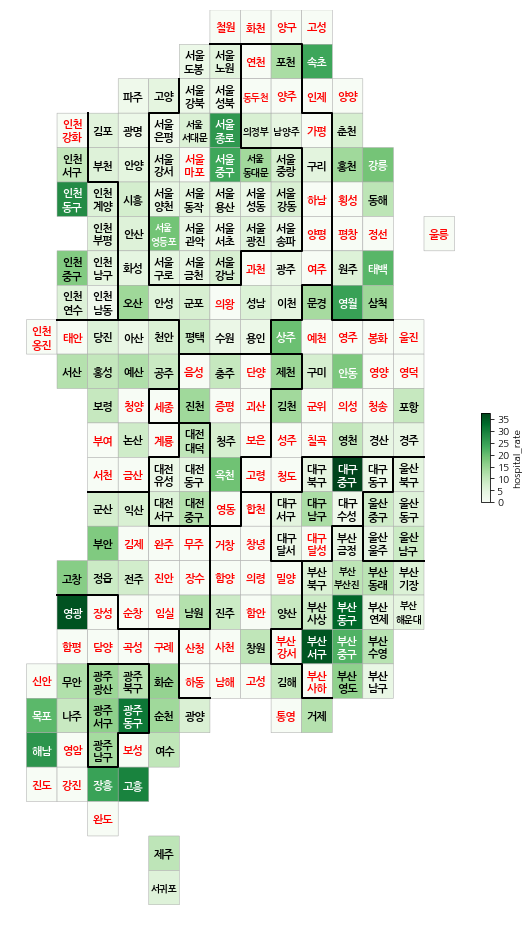

In [18]:
drawKorea('hospital_rate', addr_hos_pop, 'd1', 'd2', 'Greens')

#### 인구밀도와 종합병원 개수의 상관관계를 알아봅시다.

In [19]:
import scipy.stats

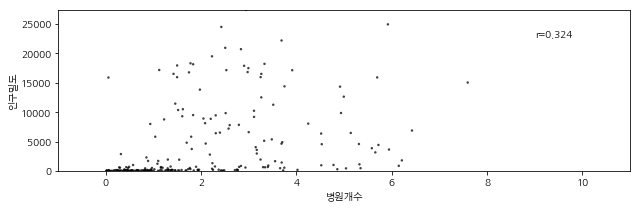

In [20]:
fig = plt.figure(figsize=(9, 3))

def plot_nstores(var, b1, b2, label1, label2):
    plt.scatter(var[b1] + np.random.random(len(var)),
                var[b2] + np.random.random(len(var)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, max(var[b1]))
    plt.ylim(-1, max(var[b2]))
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    r = scipy.stats.pearsonr(var[b1], var[b2])
    plt.annotate('r={:.3f}'.format(r[0]), (9, 23000))

# ax = fig.add_subplot(1, 3, 1)
plot_nstores(addr_hos_pop, 'count', 'density', '병원개수', "인구밀도")
plt.tight_layout()

###  약한 상관관계를 보이는 것을 알 수 있습니다.

### 그럼.. 병원의 개수가 0인 지역을 제외하고 병원개수와 인구밀도의 상관관계를 볼까요??

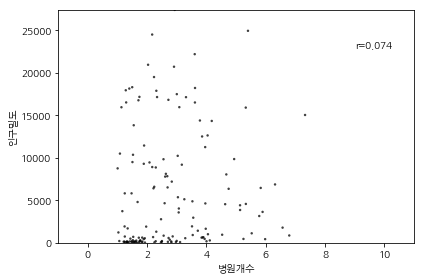

In [21]:
addr_hos_pop_corr = addr_hos_pop[addr_hos_pop['count']>0]
plot_nstores(addr_hos_pop_corr, 'count', 'density', '병원개수', "인구밀도")
plt.tight_layout()

###  거의 상관관계가 없는 것으로 판단 됩니다.